# **230322 Parrot 통계 세션**

In [ ]:
# 구글 드라이브와 코랩을 연동하는 코드
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 사용하고자 하는 csv 파일의 경로를 복사
import pandas as pd
df_score = pd.read_csv('/content/drive/MyDrive/Parrot/test_score.csv')

In [ ]:
df_score.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Estimate of Location

mean을 이용하여 평균 구하기

In [ ]:
df_score.mean()

<ipython-input-5-1c0cf96bae76>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_score.mean()


math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

In [ ]:
# math score의 평균 구하기
df_score['math score'].mean()

66.089

In [ ]:
# reading score의 평균 구하기


69.169

In [ ]:
# writing score의 평균 구하기


68.054

median 메소드를 이용하여 중앙값 구하기

In [ ]:
df_score.median()

<ipython-input-9-ac63a4d06262>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_score.median()


math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

In [ ]:
# math score의 중앙값 구하기
df_score['math score'].median()

66.0

In [ ]:
# reading score의 중앙값 구하기


70.0

In [ ]:
# writing score의 중앙값 구하기


69.0

trim_mean 메소드를 이용하여 절사평균 구하기

In [ ]:
# math score의 절사평균 구하기
from scipy import stats
stats.trim_mean(df_score['math score'], 0.1) # 양 끝 10% 제거

66.3775

In [ ]:
# reading score의 절사평균 구하기
from scipy import stats


69.50125

In [ ]:
# writing score의 절사평균 구하기
from scipy import stats


68.4075

numpy를 이용해서 가중평균 구하기

In [ ]:
# reading score를 가중치로 두고 writing score의 가중평균 구하기
import numpy as np
np.average(df_score['writing score'], weights = df_score['reading score'])

71.11281065217077

In [ ]:
# writing score를 가중치로 두고 reading score의 가중평균 구하기
import numpy as np


72.27792635260235

## Estimate of Variability

std 메소드를 이용하여 표준편차 구하기

In [ ]:
# math score의 표준편차 구하기
df_score['math score'].std()

15.16308009600945

In [ ]:
# reading score의 표준편차 구하기


14.600191937252216

In [ ]:
# writing score의 표준편차 구하기


15.19565701086965

quantile 메소드를 이용하여 IQR 구하기

In [ ]:
# math score의 IQR 구하기
df_score['math score'].quantile(0.75) - df_score['math score'].quantile(0.25)

20.0

In [ ]:
# reading score의 IQR 구하기


20.0

In [ ]:
# writing score의 IQR 구하기


21.25

robust.scale.mad를 사용하여 중위절대편차 구하기

In [ ]:
# math score의 Mad 구하기
from statsmodels import robust
robust.mad(df_score['math score'])

14.82602218505602

In [ ]:
# reading score의 Mad 구하기
from statsmodels import robust


14.82602218505602

In [ ]:
# writing score의 Mad 구하기
from statsmodels import robust


16.30862440356162

히스토그램으로 데이터 분포 시각화하기
  - kind : 그래프 종류
  - y : 그래프로 나타내고 싶은 column

<Axes: ylabel='Frequency'>

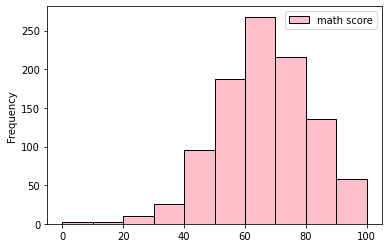

In [ ]:
# math score의 히스토그램
df_score.plot(kind = 'hist', y = 'math score', color = 'pink', edgecolor = 'black') 

<Axes: ylabel='Frequency'>

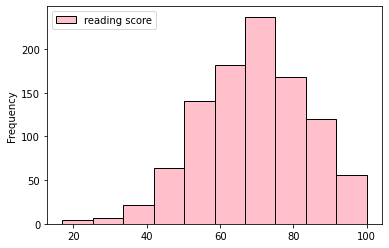

In [ ]:
# reading score의 히스토그램


<Axes: ylabel='Frequency'>

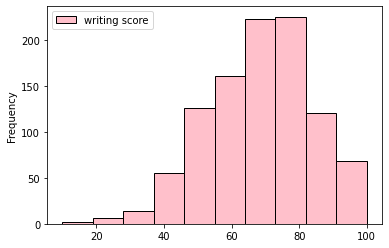

In [ ]:
# writing score의 히스토그램


박스 플롯으로 사분위수 시각화하기

<Axes: >

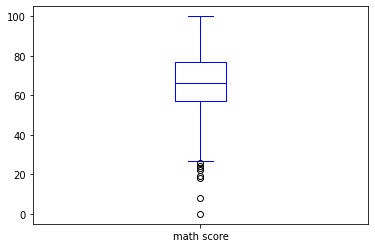

In [ ]:
# math score의 박스 플롯
df_score.plot(kind = 'box', y = 'math score', color = 'blue') 

<Axes: >

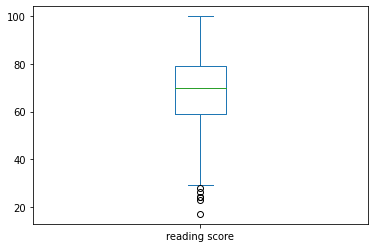

In [ ]:
# reading score의 박스 플롯


<Axes: >

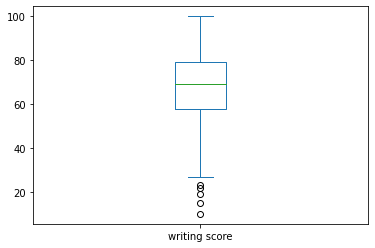

In [ ]:
# writing score의 박스 플롯


math score    Axes(0.125,0.125;0.775x0.755)
dtype: object

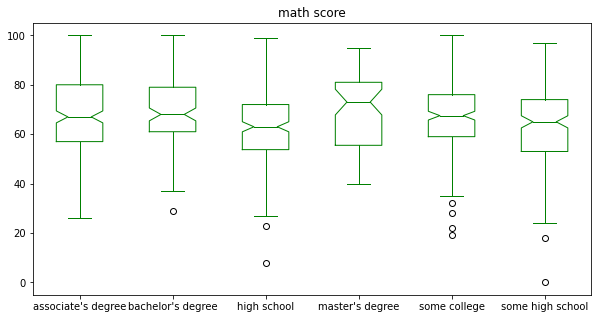

In [ ]:
# notch : 중위수 기준으로 허리선 추가
df_score.plot(kind = 'box', column = 'math score', by = 'parental level of education', notch = True, color = 'green', figsize = (10, 5))

다섯 숫자 요약(five number summary)

In [ ]:
df_score.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Correlation 

corr 메소드를 이용하여 상관계수 구하기

In [ ]:
df_score.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Heatmap을 이용하여 상관계수 시각화하기

<Axes: >

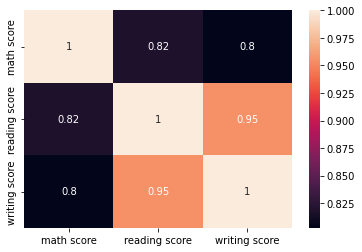

In [ ]:
import seaborn as sns
sns.heatmap(df_score.corr(), annot = True)
# annot = True 옵션은 상관계수를 보여줌

Scatter plot을 이용하여 상관계수 시각화하기

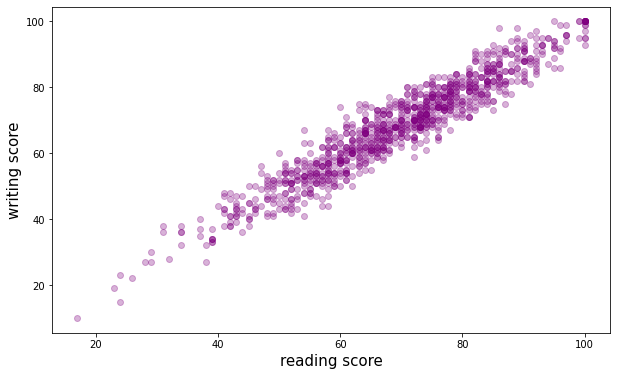

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))

# 순서대로 x축에 들어갈 컬럼, y축에 들어갈 컬럼, 색깔, 투명도
plt.scatter(df_score['reading score'], df_score['writing score'], c = 'purple', alpha = 0.3)

plt.xlabel('reading score', size = 15)
plt.ylabel('writing score', size = 15)
plt.show()

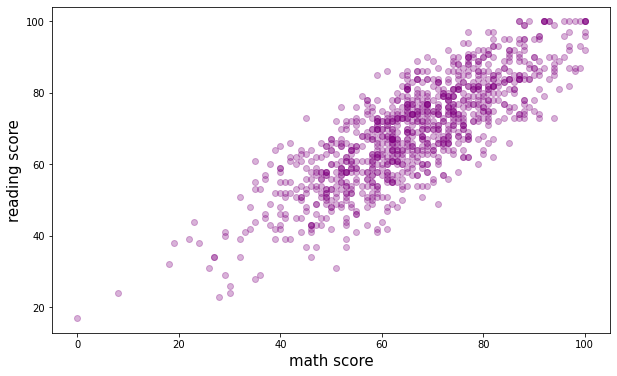

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))




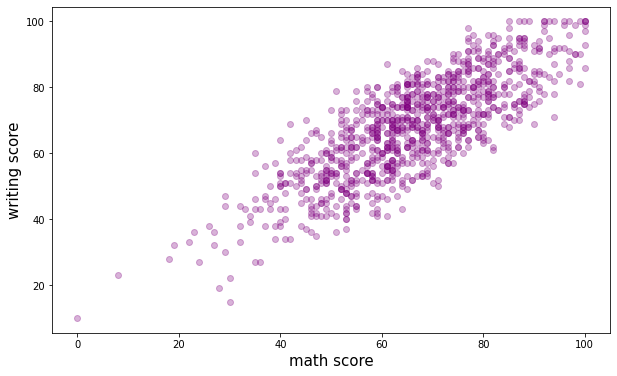

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))




## Distribution

정규분포 가정

실제 데이터를 분석할 때 정규분포를 가정하기 전에 반드시 실제 분포와 정규 분포를 비교해야 함

- fig : 그래프가 그려지는 프레임
- ax : 그래프가 그려지는 캔버스
- nrows : 행
- ncols : 열
- linspace : 간격 배분
- kdeplot : 밀도그래프

<ipython-input-40-acc7997998e4>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_score['math score'], shade=True, label='real distribution', ax=ax[1])


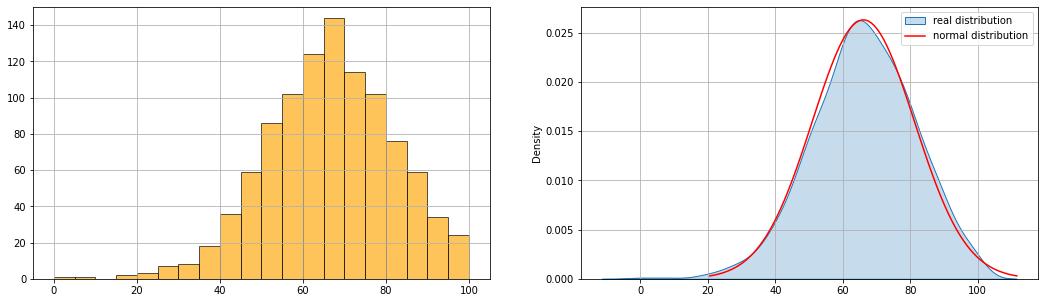

In [ ]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

np.random.seed(1234)

ax[0].hist(df_score['math score'], bins=20, color='orange', edgecolor='k', alpha=0.65)
ax[0].set_ylim(0, 150)
ax[0].grid()

x1 = np.linspace(df_score['math score'].mean() - 3*df_score['math score'].std(), df_score['math score'].mean() + 3*df_score['math score'].std(), 100)
sns.kdeplot(df_score['math score'], shade=True, label='real distribution', ax=ax[1])
ax[1].plot(x1, stats.norm.pdf(x1, df_score['math score'].mean(), df_score['math score'].std()), color='red', label="normal distribution")

ax[1].grid()
ax[1].legend()
ax[1].set_xlabel("")
plt.show()

StandardScaler를 이용하여 표준화하기

In [ ]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

# 표준화한 값이 소수점 4번째자리까지만 출력
pd.set_option('display.float_format', lambda x: '%.4f' % x)

temp = df_score[['math score', 'reading score', 'writing score']]
scaler = preprocessing.StandardScaler()
standardized_data = scaler.fit_transform(temp)
    
standardized_df = pd.DataFrame(standardized_data, columns = ['math score', 'reading score', 'writing score'])

In [ ]:
standardized_df.describe()

,math score,reading score,writing score
count,1000.0000,1000.0000,1000.0000
mean,0.0000,0.0000,-0.0000
std,1.0005,1.0005,1.0005
min,-4.3607,-3.5750,-3.8223
25%,-0.5997,-0.6968,-0.6784
50%,-0.0059,0.0569,0.0623
75%,0.7199,0.6737,0.7207
max,2.2375,2.1127,2.1034


## ANOVA

### shapiro를 이용한 정규성 검정

P-value >= 0.05 : 정규성 만족


In [ ]:
print(stats.shapiro(df_score['math score'][df_score['parental level of education'] == 'bachelor\'s degree']))
print(stats.shapiro(df_score['math score'][df_score['parental level of education'] == 'some college']))
print(stats.shapiro(df_score['math score'][df_score['parental level of education'] == 'high school']))

ShapiroResult(statistic=0.9906343817710876, pvalue=0.6043269634246826)
ShapiroResult(statistic=0.9894108772277832, pvalue=0.09584055095911026)
ShapiroResult(statistic=0.9868258833885193, pvalue=0.06518198549747467)


### Levene를 이용한 등분산성 검정

P-value >= 0.05 : 등분산성 만족

In [ ]:
print(stats.levene(df_score['math score'][df_score['parental level of education'] == 'bachelor\'s degree'],
                   df_score['math score'][df_score['parental level of education'] == 'some college'], 
                   df_score['math score'][df_score['parental level of education'] == 'high school']))

LeveneResult(statistic=0.2338027415391228, pvalue=0.7915984637435349)


### Bartlett을 이용한 등분산성 검정

P-value >= 0.05 : 등분산성 만족

In [ ]:
print(stats.bartlett(df_score['math score'][df_score['parental level of education'] == 'bachelor\'s degree'],
                     df_score['math score'][df_score['parental level of education'] == 'some college'],
                     df_score['math score'][df_score['parental level of education'] == 'high school']))

BartlettResult(statistic=0.2882636267537085, pvalue=0.8657736199931247)


In [ ]:
group_1 = df_score[df_score['parental level of education']=='bachelor\'s degree']['math score']
group_2 = df_score[df_score['parental level of education']=='some college']['math score']
group_3 = df_score[df_score['parental level of education']=='high school']['math score']

### One-way ANOVA

In [ ]:
F_statistic, p_val = stats.f_oneway(group_1, group_2, group_3)

print(f'ANOVA 결과 : F={F_statistic:.5f}, p={p_val:.5f}\n')

if p_val <= 0.05:
    print('P-value가 충분히 작기 때문에 집단의 평균값이 통계적으로 유의하게 차이납니다.')
else:
    print('P-value가 충분히 작지 않기 때문에 집단의 평균값이 통계적으로 유의하게 차이가 나지 않습니다.')

ANOVA 결과 : F=10.76443, p=0.00003

P-value가 충분히 작기 때문에 집단의 평균값이 통계적으로 유의하게 차이납니다.


### Bonferroni correction으로 사후분석

In [ ]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

comp = MultiComparison(df_score['math score'], df_score['parental level of education'])
result = comp.allpairtest(stats.ttest_ind, method = 'bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
associate's degree,bachelor's degree,-0.8787,0.3802,1.0,False
associate's degree,high school,3.9481,0.0001,0.0014,True
associate's degree,master's degree,-0.8411,0.401,1.0,False
associate's degree,some college,0.5427,0.5876,1.0,False
associate's degree,some high school,2.8201,0.005,0.0756,False
bachelor's degree,high school,4.2361,0.0,0.0004,True
bachelor's degree,master's degree,-0.1487,0.882,1.0,False
bachelor's degree,some college,1.3702,0.1715,1.0,False
bachelor's degree,some high school,3.1967,0.0015,0.0231,True
high school,master's degree,-3.4894,0.0006,0.0086,True


### Tuckey's HSD로 사후분석

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd = pairwise_tukeyhsd(df_score['math score'], df_score['parental level of education'], alpha = 0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
associate's degree,bachelor's degree,1.5069,0.9503,-3.3587,6.3726,False
associate's degree,high school,-5.7451,0.0013,-9.9311,-1.5591,True
associate's degree,master's degree,1.8629,0.9578,-4.3927,8.1185,False
associate's degree,some college,-0.7546,0.9948,-4.7903,3.2812,False
associate's degree,some high school,-4.3857,0.0418,-8.676,-0.0954,True
bachelor's degree,high school,-7.2521,0.0005,-12.2284,-2.2757,True
bachelor's degree,master's degree,0.3559,1.0,-6.4539,7.1658,False
bachelor's degree,some college,-2.2615,0.7676,-7.1122,2.5892,False
bachelor's degree,some high school,-5.8926,0.0119,-10.957,-0.8282,True
high school,master's degree,7.608,0.0084,1.2659,13.9501,True
